In [3]:
from torch_geometric.data import Data
import torch

# Define edges (two lists: source and target)
edge_index = torch.tensor([
    [0, 1, 0, 2],
    [1, 0, 2, 1]
], dtype=torch.long)

# Define node features (3 nodes, 1 feature each)
x = torch.tensor([[1], [2], [3]], dtype=torch.float)

# Create a PyG Data object
data = Data(x=x, edge_index=edge_index)

print(data)


Data(x=[3, 1], edge_index=[2, 4])


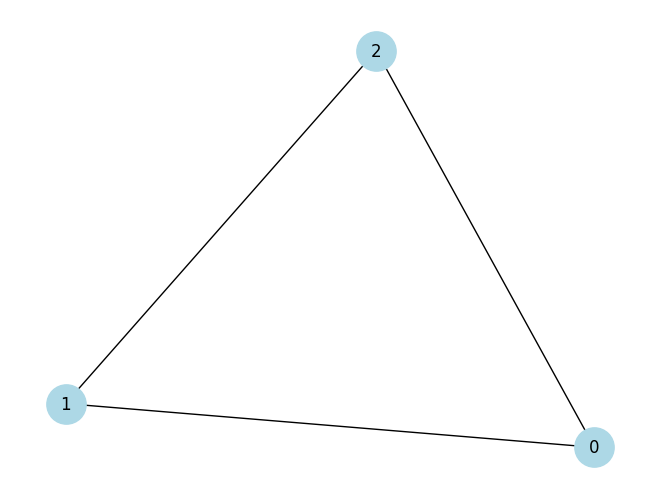

In [4]:
from torch_geometric.utils import to_networkx
import networkx as nx
import matplotlib.pyplot as plt

G = to_networkx(data, to_undirected=True)
nx.draw(G, with_labels=True, node_color="lightblue", node_size=800)
plt.show()


## Load and build-in Dataset

In [5]:
from torch_geometric.datasets import KarateClub

dataset = KarateClub()
data = dataset[0]
print(data)


Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])


In [6]:
print(f'Number of features: {data.num_features}')
print(f'Number of classes: {dataset.num_classes}')
print(f'Edge index shape: {data.edge_index.shape}')
print(f'Node features shape: {data.x.shape}')


Number of features: 34
Number of classes: 4
Edge index shape: torch.Size([2, 156])
Node features shape: torch.Size([34, 34])


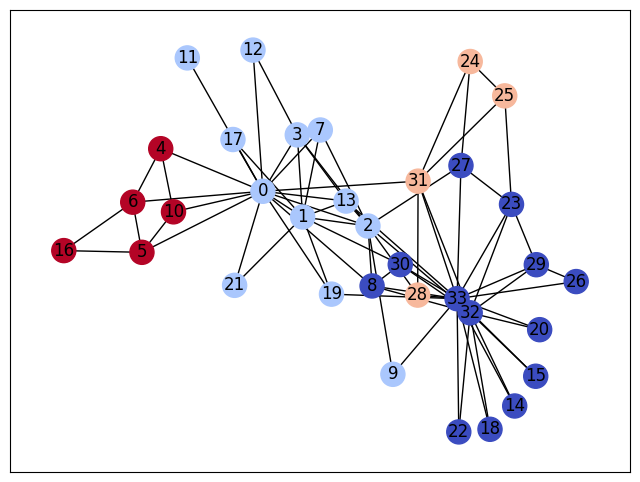

In [7]:
G = to_networkx(data, to_undirected=True)
plt.figure(figsize=(8, 6))
nx.draw_networkx(G, with_labels=True, node_color=data.y, cmap='coolwarm')
plt.show()


## EX1

In [ ]:
# Create a custom graph with 5 nodes and the following edges:
# 0→1, 0→2, 1→3, 2→4, 3→4
# Each node feature = [node_id * 10]
# Then visualize it.

In [16]:
edge_index = torch.tensor([
    [0, 0, 1, 2, 3],
    [1, 2, 3, 4, 4]
], dtype=torch.long)

x = torch.tensor([
    [10],
    [20],
    [30],
    [40]], dtype=torch.float)

data = Data(x=x, edge_index=edge_index)

print(data)



Data(x=[4, 1], edge_index=[2, 5])


In [20]:
print("\nVerifying contents:")
print(f"Node features (data.x):\n{data.x}")
print(f"Edge index (data.edge_index):\n{data.edge_index}")
print(f"Is directed: {data.is_directed()}")


Verifying contents:
Node features (data.x):
tensor([[10.],
        [20.],
        [30.],
        [40.]])
Edge index (data.edge_index):
tensor([[0, 0, 1, 2, 3],
        [1, 2, 3, 4, 4]])
Is directed: True


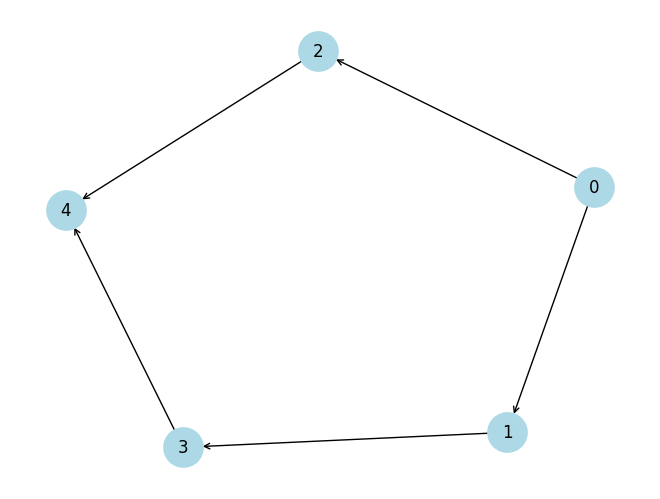

In [26]:
G = to_networkx(data, to_undirected=True)
nx.draw(G, with_labels=True, node_color="lightblue", node_size=800, arrows = True, arrowstyle = "->")
plt.show()

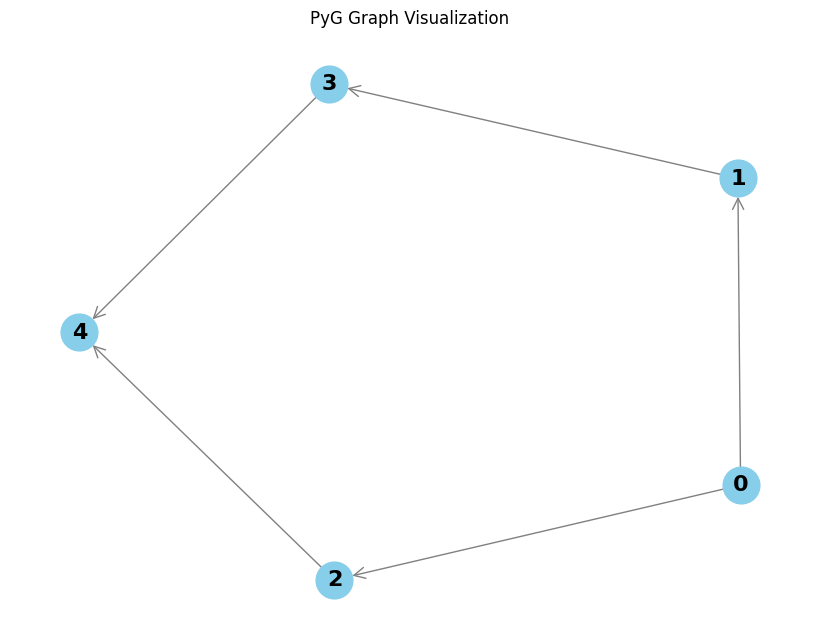

In [21]:
# Draw the graph using matplotlib
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)  # for a consistent layout
nx.draw(
    G,
    pos,
    with_labels=True,
    node_color='skyblue',
    node_size=700,
    edge_color='gray',
    font_size=16,
    font_weight='bold',
    arrows=True,
    arrowstyle='->',
    arrowsize=20
)
plt.title("PyG Graph Visualization")
plt.show()

## EX2

In [11]:
# After creating your custom graph:
# Print the number of nodes, edges
# Print the adjacency list
# Check the shape of your node feature matrix x
# (Hint: use data.num_nodes, data.num_edges, data.x.shape)

In [27]:
print(data.x)

tensor([[10.],
        [20.],
        [30.],
        [40.]])


In [29]:
print(data.num_nodes, data.num_edges)

4 5


In [30]:
print(data.x.shape)

torch.Size([4, 1])


In [31]:
import torch_geometric.utils as utils
import networkx as nx
G = utils.to_networkx(data, to_undirected=False)
adj_list = nx.to_dict_of_lists(G)
print("Adjacency matrix:", adj_list)

Adjacency matrix: {0: [1, 2], 1: [3], 2: [4], 3: [4], 4: []}


--- Graph Details ---
Number of nodes: 5
Number of edges: 5
Shape of node features (data.x.shape): torch.Size([5, 1])
Adjacency list: {0: [1, 2], 1: [3], 2: [4], 3: [4], 4: []}
